<center> 

# Cover Page 








# Name: 

# Course Name: 

# INTRODUCTION

### Analysis Problem
1. Does Vacination against Covid-19 actually reduce the Death rate of covid patients?
2. What are the Hidden Patterns in the Dataset?
3. Can Classification models  predict countries or areas with Death record from the Covid 19 pandemic?
4. Which country(ies) has a Death Record form the Covid 19 Pandemic?

### Aims of Study
1. To ascertain the influence of vacinations on covid patients against the pandemic
2. To identify the hidden patterns in the dataset.
3. To train classification models to predict the cities or areas attacked by the virus

## Section A: EXPLORATORY DATA ANALYSIS (EDA)
1. Import the four datasets required
    * ConfirmedCasesByDateReported.csv
    * ConfirmedCasesBySpecimenDate.csv
    * PatientNewAdmissions.csv
    * Vaccinations.csv
    * Deaths.csv
2. Perform EDA on each of the dataset, thereafter merge the dataset into a master DataFrame
    * Missing Values
    * Outliers
    * Irregularities
    * Visualizations for trends and Patterns
    * Merging data into a master DataFrame
    * Master Data Preprocessing and Engineering

## Section B: PATTERN RECOGNITION
1. Clustering Analysis - for pattern recognition and identification of countries with records of covid-19 cases
    * KMeans Clustering
    * Sihollete Score Analysis

## Section C: CLASSIFICATION MODEL TRAINING
4. Classification Model Training - for identification of countries with record of death
    * Decision Tree Classifier
    * Random Forest Classifier
    * Model Performance Evaluation

## Conclusion

# SECTION A: EXPLORATORY DATA ANALYSIS (EDA)

#### Aim 1: To ascertain the influence of vacinations on covid patients against the pandemic

###### other objectives
* To understand the trends in the datasets chosen for the analaysis and model training independently

#### Step 1: Import of Neccessary Libraries

In [1]:
import pandas as pd # For DataFrame construct
import numpy as np # For Numerical Analysis
import matplotlib.pyplot as plt # For Visualizations and plots
import seaborn as sns

#### Step 2: Loading of the Dataset

###### Dataset 1: Confirmed Cases By Date Reported Dataset

In [2]:
# Loading of the confirmed cases by date reported dataset
case_by_reported_date = pd.read_csv('ConfirmedCasesByDateReported.csv')

# printing the first five rows of the dataset
case_by_reported_date.head()

,areaName,date,newCasesByPublishDate
0,United Kingdom,25/3/2021,6397
1,United Kingdom,24/3/2021,5605
2,United Kingdom,23/3/2021,5379
3,United Kingdom,22/3/2021,5342
4,United Kingdom,21/3/2021,5312


Let's examine the nature of the dataset

In [3]:
# Taking an overview of the dataset
case_by_reported_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
areaName                 421 non-null object
date                     421 non-null object
newCasesByPublishDate    421 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.9+ KB


From the code block 3, we derive the following;
1. There exist 3 variables (columns) in the dataset with 421 observations (rows)
2. There exsit two data types in the dataset; Objects and integers

Let's Look out for missing values and duplicates in the dataset

In [4]:
#1 Checking for missing values
case_by_reported_date.isna().sum()

areaName                 0
date                     0
newCasesByPublishDate    0
dtype: int64

In [5]:
#2 checking for duplicates 
case_by_reported_date.duplicated().sum()

0

The dataset is void of missing values and duplicates!!!

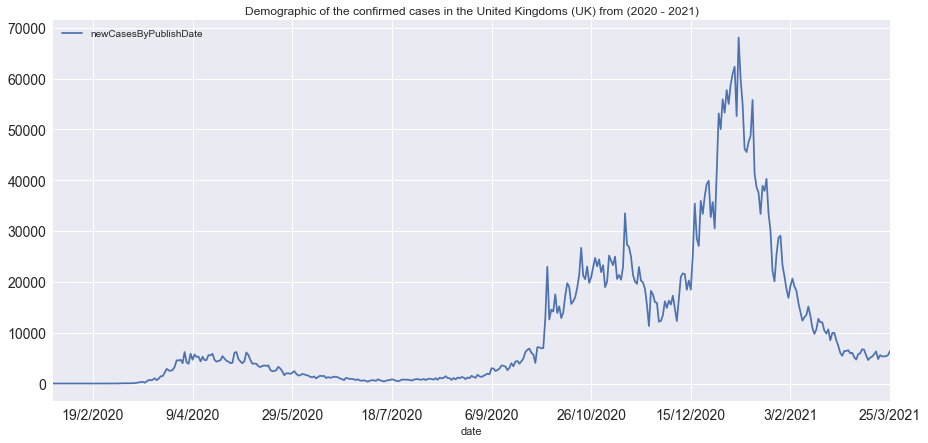

In [6]:
# Let's Visualize to see the trend that exist in the the cases confirmed
plt.style.use('seaborn')

# Making a plot using the pandas plot feature 
case_by_reported_date[
        ['date', 'newCasesByPublishDate']
    ].set_index('date').plot(
        title="Demographic of the confirmed cases in the United Kingdoms (UK) from (2020 - 2021)", figsize=(15, 7), fontsize=14
    ).invert_xaxis()

# Showing the plot
plt.show()

Demographic trends
1. The trend shows the existence of more confirmed cases between 15th of January 2020 down to 3rd of February 2021
2. The reason for the trend is that, there outbreak and spread of the virus became more renounced during between December 2020 to February 2021 before the inceptions vaccines and other preventive measures which reduced the rate of cases recorded.

Let's examine the cases confirmed with respect to the specimen date

##### Dataset 2: Confirmed Cases By Specimen Date Dataset

In [7]:
# Loading the confirmed cases by specimen dataset in the pandas DataFrame for easy manipulation
case_by_specimen_date = pd.read_csv('ConfirmedCasesBySpecimenDate.csv')

# Printing out the first five rows of the dataset
case_by_specimen_date.head()

,areaName,date,newCasesBySpecimenDate
0,United Kingdom,23/3/2021,4901
1,United Kingdom,22/3/2021,6255
2,United Kingdom,21/3/2021,5397
3,United Kingdom,20/3/2021,4040
4,United Kingdom,19/3/2021,5045


Let's examine the nature of the confirmed cases by specimen date dataset

In [8]:
# Taking an overview of the Confirmed cases data with respect to the specimen date
case_by_specimen_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 3 columns):
areaName                  419 non-null object
date                      419 non-null object
newCasesBySpecimenDate    419 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.9+ KB


From the code above, we derive the following;
1. There exist 3 variables (columns) in the dataset with 419 observations (rows)
2. There exsit two data types in the dataset; Objects and integers

Looking out for missing values and duplicates

In [9]:
#1 Checking for missing values
case_by_specimen_date.isna().sum()

areaName                  0
date                      0
newCasesBySpecimenDate    0
dtype: int64

In [10]:
#2. Checking for duplicates
case_by_specimen_date.duplicated().sum()

0

There exist no missing value and duplicates in the confirmed case by specimen date!!!

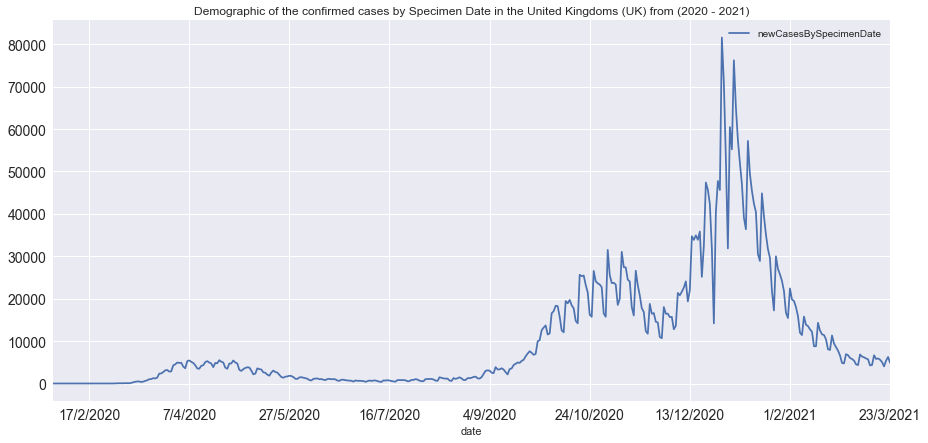

In [11]:
# Let's Visualize to see the trend that exist in the the cases confirmed by specimen date
plt.style.use('seaborn')

# Making a plot using the pandas plot feature 
case_by_specimen_date[
        ['date', 'newCasesBySpecimenDate']
    ].set_index('date').plot(
        title="Demographic of the confirmed cases by Specimen Date in the United Kingdoms (UK) from (2020 - 2021)", figsize=(15, 7), fontsize=14
    ).invert_xaxis()

# Showing the plot
plt.show()

Demographic trends
1. The trend shows the existence of more confirmed cases between 13th of January 2020 down to 1st of February 2021
2. The reason for the trend is that, the virus became rampant between the month of December 2020 through February 2023, and as such studies were carried out on the specimen to provide remedy to the pandemic

Let's Examine the difference and the similarities between the confirmed cases by published date and specimen date

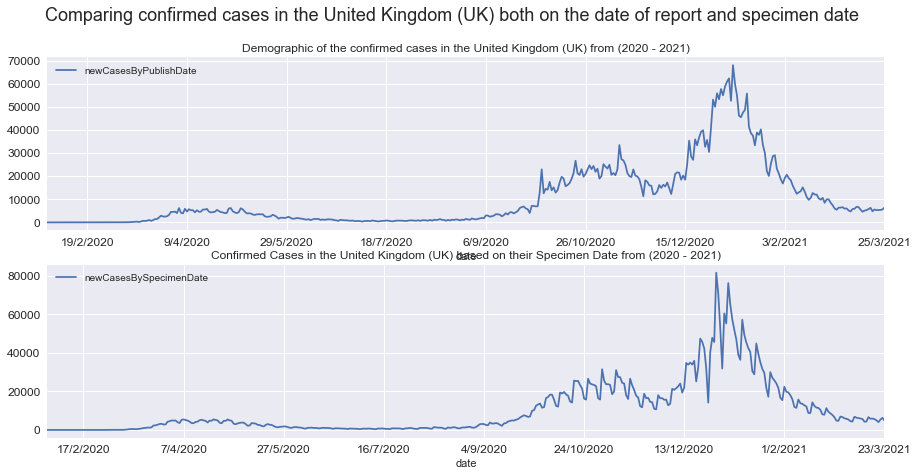

In [12]:
def plot_cases(
    dataframe, date_column='date', case_column=None, 
    ax=None, title=None, fontsize=None):
    """
    Plots a graph that demonstrates degree of flow of cases with time.
    """
    
    dataframe[
        [date_column, case_column]
    ].set_index(date_column).plot(
        title=title, figsize=(15, 7), ax=ax, 
        fontsize=fontsize
    ).invert_xaxis();

# Making Subplots for the different cases
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
ax1, ax2 = axes.ravel()

general_title = "Comparing confirmed cases in the United Kingdom (UK) both on the date of report and specimen date"
fig.suptitle(general_title, fontsize=18)

# Subplot 1
title_1 = "Demographic of the confirmed cases in the United Kingdom (UK) from (2020 - 2021)"
plot_cases(case_by_reported_date, case_column='newCasesByPublishDate', ax=ax1, title=title_1, fontsize=12)

# Subpot 2
title_2 = "Confirmed Cases in the United Kingdom (UK) based on their Specimen Date from (2020 - 2021)"
plot_cases(case_by_specimen_date, case_column='newCasesBySpecimenDate', ax=ax2, title=title_2, fontsize=12)

#plt.savefig(general_title+'.png', dpi=200, transparent=True)


There exist no much difference between the confirmed cases by report date and by specimen date, rather there exist similarities as there rise and fall of the outbreak of the pandemic exist in almost similar dates with a remarkable increase between October 2020 and a reduction in the spread by Febraury 2021 for the both datasets and dates.

###### Dataset 3: Patient New Admissions

In [13]:
# Loading the dataset into the pandas DataFrame
new_patients_admitted = pd.read_csv('PatientNewAdmissions.csv')

# Printing the first five rows of the dataset
new_patients_admitted.head()

,areaName,date,newAdmissions
0,United Kingdom,2/2/2021,2460
1,United Kingdom,1/2/2021,2590
2,United Kingdom,31/1/2021,2379
3,United Kingdom,30/1/2021,2447
4,United Kingdom,29/1/2021,2664


Let's examine the nature of the dataset

In [14]:
# Taking the overview of the dataset
new_patients_admitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 3 columns):
areaName         317 non-null object
date             317 non-null object
newAdmissions    317 non-null int64
dtypes: int64(1), object(2)
memory usage: 7.5+ KB


From above code;
1. The dataset have 3 variables (columns) and 317 observations (rows)
2. It consist of 2 datatypes; objects and integers

Checking for missing values and other irregularities in the dataset

In [15]:
#1 Checking for missing values
new_patients_admitted.isna().sum()

areaName         0
date             0
newAdmissions    0
dtype: int64

In [16]:
new_patients_admitted.duplicated().sum()

0

There exist no missing values nor any duplicate in the new admission dataset!!!

Let's examine the trend in the admission and in which month of which year was there highest number of admission of new patients of Covid-19

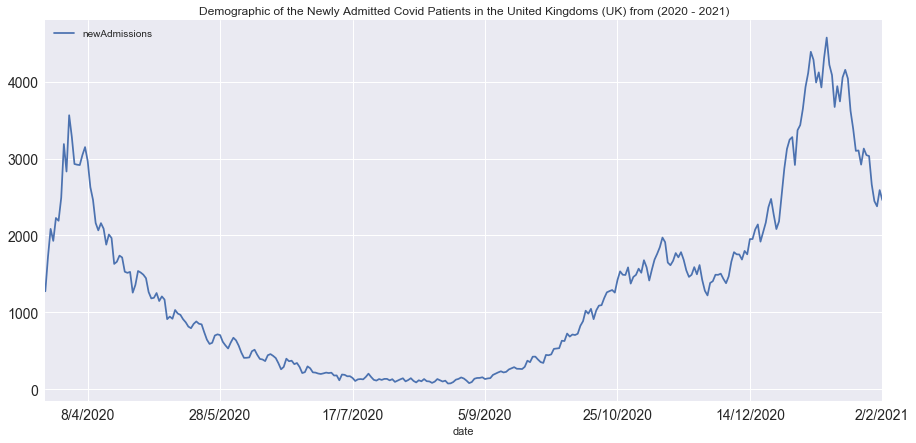

In [17]:
# Let's Visualize to see the trend that exist in the the cases confirmed by specimen date
plt.style.use('seaborn')

# Making a plot using the pandas plot feature 
new_patients_admitted[
        ['date', 'newAdmissions']
    ].set_index('date').plot(
        title="Demographic of the Newly Admitted Covid Patients in the United Kingdoms (UK) from (2020 - 2021)", figsize=(15, 7), fontsize=14
    ).invert_xaxis()

# Showing the plot
plt.show()

From the Plot above, Patients wwere admitted fro April 2020 through February 2021 this shows that;
1. The admission of patients started immediately a case of the covid was confirmed both by published date and the specimen date as shown above.
2. There was then a slight reduction in the patients being admitted from June 2020 through September 2020
3. Another phase of the outbreak of the virus increased the rate of the admission of patients from October 2020 through february 2021. 
4. It is affirmed that for every confirmed case, there number of admitted patients is often influenced and caused to increase.

##### Dataset 4: Vaccinations

It is obvious that after the confirmation of a virus case, there has to a quarantine or admission of such patient to the hospital for proper treatment and revitalization. But there exist a preventive measure which are in terms of vaccines for the prevention of the outbreak of the virus and the reduction of the virus. Thus, some persons received the vaccines and were covered. Let's examine the data for which got vaccinations.

In [18]:
# Loading the dataset into the DataFrame
patients_vacinated = pd.read_csv('Vaccinations.csv')

# Printing the first five rows of the dataset
patients_vacinated.head()

,areaName,date,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,England,14/2/2021,2270123,12844193,17521,487697
1,England,7/2/2021,2398160,10574070,8571,470176
2,England,31/1/2021,2198114,8175910,8466,461605
3,England,24/1/2021,2244887,5977796,6527,453139
4,England,17/1/2021,1608244,3732909,40483,446612


In [19]:
# Taking an overview of the dataset
patients_vacinated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
areaName                                             40 non-null object
date                                                 40 non-null object
weeklyPeopleVaccinatedFirstDoseByVaccinationDate     40 non-null int64
cumPeopleVaccinatedFirstDoseByVaccinationDate        40 non-null int64
weeklyPeopleVaccinatedSecondDoseByVaccinationDate    40 non-null int64
cumPeopleVaccinatedSecondDoseByVaccinationDate       40 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


The Patients with vacination dataset has the following characteristics;
1. It has 6 variables (columns) and 40 observations (entries or rows)
2. it has two data types - The object and the integer

In [20]:
# Checking for missing values
patients_vacinated.isna().sum()

areaName                                             0
date                                                 0
weeklyPeopleVaccinatedFirstDoseByVaccinationDate     0
cumPeopleVaccinatedFirstDoseByVaccinationDate        0
weeklyPeopleVaccinatedSecondDoseByVaccinationDate    0
cumPeopleVaccinatedSecondDoseByVaccinationDate       0
dtype: int64

In [21]:
# Checking for duplicates
patients_vacinated.duplicated().sum()

0

There exist no missing values and no duplicates!!!

In [22]:
patients_vacinated['areaName'].unique()

array(['England', 'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

There are five countries which got the vaccination, there include;
1. England
2. Northern Ireland
3. Scotland
4. Wales

Let's Visualize to see the spread of the vaccines given

From the plot above, the following insights could be derived;
1. The area with the highest number 

In [23]:
# Lets examine which country has the highest average vaccination for both first vaccine and second vaccine doses
vaccinated_patients = patients_vacinated[['areaName', 'weeklyPeopleVaccinatedFirstDoseByVaccinationDate' ,'weeklyPeopleVaccinatedSecondDoseByVaccinationDate']]

# Renaming the columns names
vaccinated_patients.columns = ['Area', 'First Dose Vaccine', 'Second Dose Vaccine']

vaccinated_patients.groupby('Area').mean()
#vaccinated_patients.head()

,First Dose Vaccine,Second Dose Vaccine
Area,,
England,1284419.3,48769.7
Northern Ireland,39724.3,2900.5
Scotland,125519.0,1577.7
Wales,78847.5,543.6


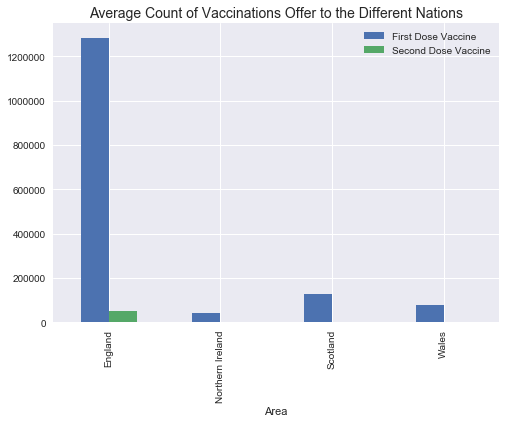

In [24]:
# Lets visualize for better understanding
#plt.style.use('whitegrid')

vaccinated_patients.groupby('Area').mean().plot(kind='bar')
plt.title('Average Count of Vaccinations Offer to the Different Nations', fontsize=14)
plt.show()

From the analysis;

1. England has the highest population which received vaccination for both the first dose and the second dose.
2. Scotland has the second highest population with vaccination for the first dose followed by the Wales and the Northen Ireland.
3. For the second dose Northen Ireland has the second highest population, followed by Scotland then Wales lastly.

##### Dataset 5: Deaths 

Despite the vaccinations, there were some death records from the virus attack. Let's explore the deaths record and the trends which exist.

In [25]:
# Loading the dataset into the DataFrame
deaths = pd.read_csv('Deaths.csv')

# Displaying the first five rows
deaths.head()

,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,United Kingdom,10/3/2021,32,125165.0
1,United Kingdom,9/3/2021,97,125133.0
2,United Kingdom,8/3/2021,130,125036.0
3,United Kingdom,7/3/2021,102,124906.0
4,United Kingdom,6/3/2021,128,124804.0


In [26]:
# Taking an overview of the dataset 
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
areaName                      376 non-null object
date                          376 non-null object
newDeaths28DaysByDeathDate    376 non-null int64
cumDeaths28DaysByDeathDate    374 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.8+ KB


The deaths dataset has 4 columns with 376 observations for which the datatype are;
* Objects
* Integers
* Floats

In [27]:
# Let's check fr missing values
deaths.isna().sum()

areaName                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    2
dtype: int64

In [28]:
# Let's check for duplicates
deaths.duplicated().sum()

0

1. There exist 2 missing values in the CumDeath28DaysByDeathDate columns
2. There exist no duplicates in the dataset.
!!!

Let's observe which month has the highest record of death cases

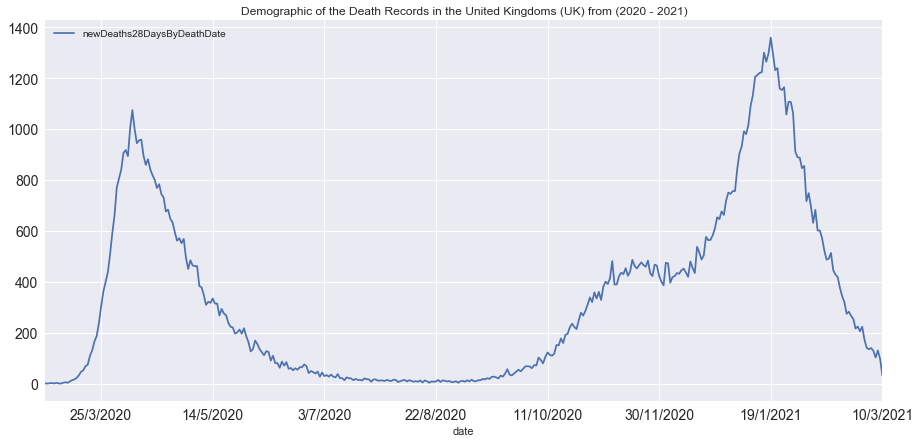

In [29]:
# Let's Visualize to see the trend that exist in the the cases confirmed by specimen date
plt.style.use('seaborn')

# Making a plot using the pandas plot feature 
deaths[
        ['date', 'newDeaths28DaysByDeathDate']
    ].set_index('date').plot(
        title="Demographic of the Death Records in the United Kingdoms (UK) from (2020 - 2021)", figsize=(15, 7), fontsize=14,
    label= 'New Deaths Record').invert_xaxis()

# Showing the plot
plt.show()

The trend shows that;

1. Death was recorded from March 2020, with a sharp increase in April 2020 then a gradual reduction through  October 2020.
2. From October 11, 2020 the increase began again with a peak increase at January 2021 thereafter a record of reduction was observed from the dataset provided.

# SECTION B - PATTERN RECOGNITION 

#### Aim 2: To identify the hidden patterns in the dataset.

##### Other Objectives
1. To Merge the entire dataset together for better understand
2. To use unsupervised learning to uncover hidden patterns in the master dataset (merged from the individual datasets)

##### Step 1: Merging of the entire dataset to have a master dataset

In [30]:
# Concatenating the datasets together
covid_data = [case_by_reported_date, case_by_specimen_date, new_patients_admitted, 
             patients_vacinated, deaths]

# Creating a master dataframe with the entire dataset together.
covid_master_data = pd.concat(covid_data)

# printing the first five rows of the master dataset
covid_master_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,areaName,cumDeaths28DaysByDeathDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,date,newAdmissions,newCasesByPublishDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate
0,United Kingdom,NaN,NaN,NaN,25/3/2021,NaN,6397.0,NaN,NaN,NaN,NaN
1,United Kingdom,NaN,NaN,NaN,24/3/2021,NaN,5605.0,NaN,NaN,NaN,NaN
2,United Kingdom,NaN,NaN,NaN,23/3/2021,NaN,5379.0,NaN,NaN,NaN,NaN
3,United Kingdom,NaN,NaN,NaN,22/3/2021,NaN,5342.0,NaN,NaN,NaN,NaN
4,United Kingdom,NaN,NaN,NaN,21/3/2021,NaN,5312.0,NaN,NaN,NaN,NaN


#### Step 2: To Perform EDA on the Master dataset
1. Drop columns which will not be useful
2. Rename the columns name for better understanding and referencing
3. Handle missing values
4. Irregularities treatment

In [31]:
# 1. Dropping of the columns with less information
covid_master_data = covid_master_data.drop(columns=['cumDeaths28DaysByDeathDate', 'cumPeopleVaccinatedFirstDoseByVaccinationDate', 'cumPeopleVaccinatedSecondDoseByVaccinationDate'])

covid_master_data.head()

,areaName,date,newAdmissions,newCasesByPublishDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate
0,United Kingdom,25/3/2021,NaN,6397.0,NaN,NaN,NaN,NaN
1,United Kingdom,24/3/2021,NaN,5605.0,NaN,NaN,NaN,NaN
2,United Kingdom,23/3/2021,NaN,5379.0,NaN,NaN,NaN,NaN
3,United Kingdom,22/3/2021,NaN,5342.0,NaN,NaN,NaN,NaN
4,United Kingdom,21/3/2021,NaN,5312.0,NaN,NaN,NaN,NaN


In [32]:
# 2. Renaming the columns name 
covid_master_data.columns = ['Area', 'Date', 'Admissions', 'Published_Date_Case', 'Specimen_Date_Case', 
                            '28_Days_Death', 'First_Dose_Vaccines', 'second_Dose_Vaccines']

# Checking for changes
covid_master_data.head()

,Area,Date,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,United Kingdom,25/3/2021,NaN,6397.0,NaN,NaN,NaN,NaN
1,United Kingdom,24/3/2021,NaN,5605.0,NaN,NaN,NaN,NaN
2,United Kingdom,23/3/2021,NaN,5379.0,NaN,NaN,NaN,NaN
3,United Kingdom,22/3/2021,NaN,5342.0,NaN,NaN,NaN,NaN
4,United Kingdom,21/3/2021,NaN,5312.0,NaN,NaN,NaN,NaN


The Columns have been renamed

In [33]:
# 3 Handling of missing values, there exist several missing values in the master dataset.
# Since there are cases which were recorded on different dates, the fields with missing values are absolutely preferred to be replaced with zeros

covid_master_data = covid_master_data.fillna(0)

In [34]:
covid_master_data.head()

,Area,Date,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,United Kingdom,25/3/2021,0.0,6397.0,0.0,0.0,0.0,0.0
1,United Kingdom,24/3/2021,0.0,5605.0,0.0,0.0,0.0,0.0
2,United Kingdom,23/3/2021,0.0,5379.0,0.0,0.0,0.0,0.0
3,United Kingdom,22/3/2021,0.0,5342.0,0.0,0.0,0.0,0.0
4,United Kingdom,21/3/2021,0.0,5312.0,0.0,0.0,0.0,0.0


In [35]:
# Let's check if there is an missing value again
covid_master_data.isna().sum()

Area                    0
Date                    0
Admissions              0
Published_Date_Case     0
Specimen_Date_Case      0
28_Days_Death           0
First_Dose_Vaccines     0
second_Dose_Vaccines    0
dtype: int64

The master dataset is void of missing values

In [36]:
# 4 let's check for duplicates
covid_master_data.duplicated().sum()

14

There exist 14 duplicates, which should be dropped for smooth training process.

In [37]:
# dropping the duplicates
covid_master_data = covid_master_data.drop_duplicates()

In [38]:
# Verifying that duplicates have been dropped
covid_master_data.duplicated().sum()

0

Dupplicates have been dropped successfully

In [39]:
covid_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 375
Data columns (total 8 columns):
Area                    1559 non-null object
Date                    1559 non-null object
Admissions              1559 non-null float64
Published_Date_Case     1559 non-null float64
Specimen_Date_Case      1559 non-null float64
28_Days_Death           1559 non-null float64
First_Dose_Vaccines     1559 non-null float64
second_Dose_Vaccines    1559 non-null float64
dtypes: float64(6), object(2)
memory usage: 109.6+ KB


#### Step 3: Preprocessing of the Data

In [40]:
# Lets make a copy of the dataset so we perform the precessing on the copied.
covid_master_data_clean = covid_master_data.copy()

covid_master_data_clean.head()

,Area,Date,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,United Kingdom,25/3/2021,0.0,6397.0,0.0,0.0,0.0,0.0
1,United Kingdom,24/3/2021,0.0,5605.0,0.0,0.0,0.0,0.0
2,United Kingdom,23/3/2021,0.0,5379.0,0.0,0.0,0.0,0.0
3,United Kingdom,22/3/2021,0.0,5342.0,0.0,0.0,0.0,0.0
4,United Kingdom,21/3/2021,0.0,5312.0,0.0,0.0,0.0,0.0


In [41]:
# Getting the unique values of the column Area
covid_master_data_clean['Area'].unique()

array(['United Kingdom', 'England', 'Northern Ireland', 'Scotland',
       'Wales'], dtype=object)

In [42]:
# Encoding the Area Column
encoding = {
    'United Kingdom': 1, 
    'England': 2,
    'Northern Ireland': 3,
    'Scotland': 4,
    'Wales' : 5
}

covid_master_data_clean['Area'] = covid_master_data_clean['Area'].replace(encoding)

In [43]:
# Let's view the dataset again
covid_master_data_clean.head()

,Area,Date,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,1,25/3/2021,0.0,6397.0,0.0,0.0,0.0,0.0
1,1,24/3/2021,0.0,5605.0,0.0,0.0,0.0,0.0
2,1,23/3/2021,0.0,5379.0,0.0,0.0,0.0,0.0
3,1,22/3/2021,0.0,5342.0,0.0,0.0,0.0,0.0
4,1,21/3/2021,0.0,5312.0,0.0,0.0,0.0,0.0


The Area has been encoded successfully, we can now drop the date column for the purpose of clustering

In [44]:
# Dropping date column
covid_master_data_clean = covid_master_data_clean.drop(columns='Date')

# Viewing the entire dataset once agan
covid_master_data_clean.head()

,Area,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,1,0.0,6397.0,0.0,0.0,0.0,0.0
1,1,0.0,5605.0,0.0,0.0,0.0,0.0
2,1,0.0,5379.0,0.0,0.0,0.0,0.0
3,1,0.0,5342.0,0.0,0.0,0.0,0.0
4,1,0.0,5312.0,0.0,0.0,0.0,0.0


Column droppped successfully.

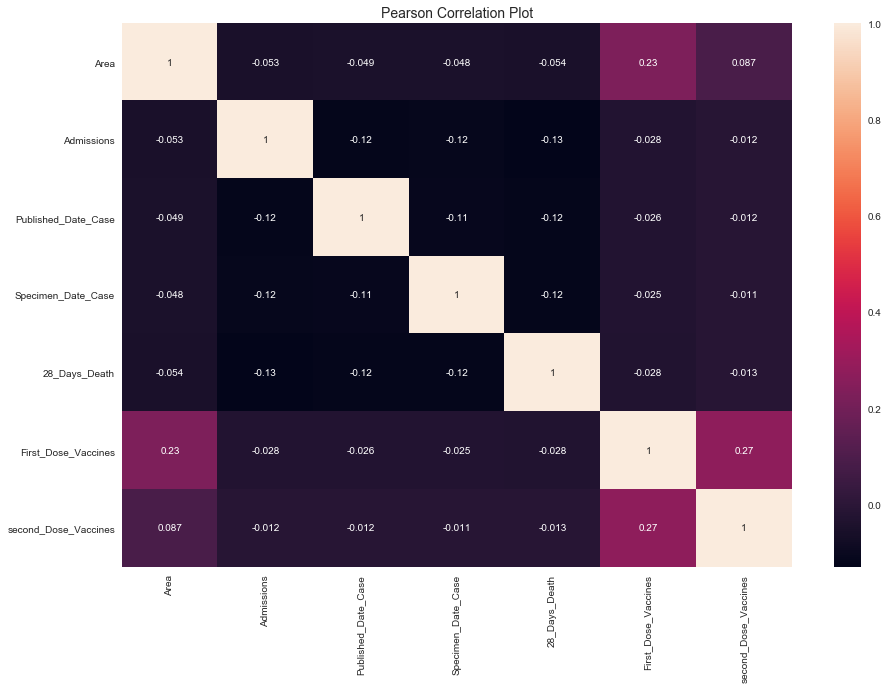

In [45]:
# Let's check for correlation before embarking on learning.

plt.figure(figsize=(15, 10))
sns.heatmap(covid_master_data_clean.corr(), annot=True)
plt.title('Pearson Correlation Plot', fontsize=14)
plt.show()

The plot shows that there exist weak correlation between the variables and the chosen target (Area). Thus, there is need for proper feature engineering (Scaling - Standardization)

In [46]:
# Implementing the scaling process
# Importing the Scaling algorithm
from sklearn.preprocessing import StandardScaler

# Dropping the target for proper scaling
covid_master_data_input = covid_master_data_clean.drop(columns='Area')

# initializing the scaler algorithm and Fitting the dataset into the algorithm for transformation
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(covid_master_data_input)

# Converting the scaled dataset into a DataFrame
covid_master_data_scaled = pd.DataFrame(input_data_scaled, columns=covid_master_data_input.columns)

# Viewing the first five rows of the dataset
covid_master_data_scaled.head()

,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
0,-0.356093,0.427766,-0.325373,-0.363311,-0.077426,-0.035024
1,-0.356093,0.333816,-0.325373,-0.363311,-0.077426,-0.035024
2,-0.356093,0.307007,-0.325373,-0.363311,-0.077426,-0.035024
3,-0.356093,0.302618,-0.325373,-0.363311,-0.077426,-0.035024
4,-0.356093,0.299059,-0.325373,-0.363311,-0.077426,-0.035024


In [47]:
# Let's examine the statistical parameters for which will validate the transformation
covid_master_data_scaled.describe()

,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines
count,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03
mean,-1.096336e-15,-5.428485e-15,1.297230e-15,8.686872e-15,-1.287189e-16,-4.211406e-17
std,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00
min,-3.560928e-01,-3.310726e-01,-3.253731e-01,-3.633105e-01,-7.742644e-02,-3.502374e-02
25%,-3.560928e-01,-3.310726e-01,-3.253731e-01,-3.633105e-01,-7.742644e-02,-3.502374e-02
50%,-3.560928e-01,-3.310726e-01,-3.253731e-01,-3.633105e-01,-7.742644e-02,-3.502374e-02
75%,-3.560928e-01,-3.304201e-01,-3.246093e-01,-3.633105e-01,-7.742644e-02,-3.502374e-02
max,5.959991e+00,7.741659e+00,9.260569e+00,5.786485e+00,1.886106e+01,3.910091e+01


The standard deviation is common to all the variables in the dataset, thus the standardization has been done successfully!!!

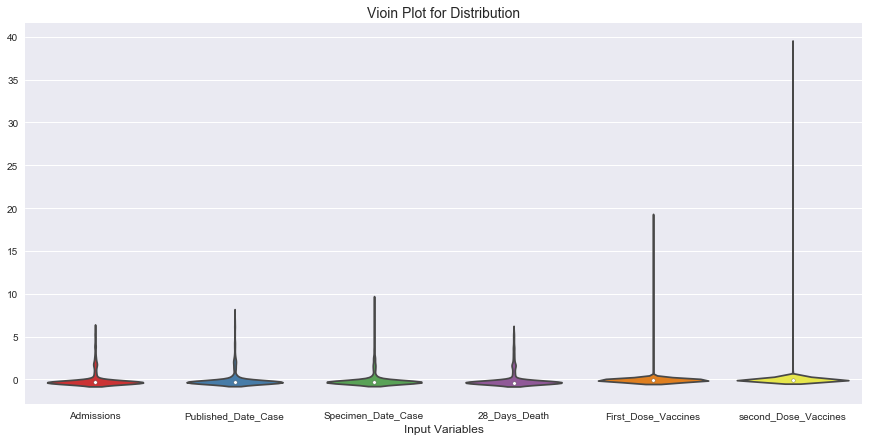

In [48]:
# Visualizing data distribution
plt.style.use('seaborn')
plt.figure(figsize = (15,7))
sns.violinplot(data=covid_master_data_scaled[covid_master_data_scaled.columns], palette = "Set1")
plt.title('Vioin Plot for Distribution', fontsize=14)
plt.xlabel('Input Variables', fontsize=12)
plt.show()

The violin plot shows the distribution of the covid dataset.

Proceeding with the clustering algorithm for identification of patterns in the dataset.

#### Step 4: Clustering
Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters; clsutering involves the following procedures;
* Determination of Optimal number of clusters
* Application of clustering algorithms such as; KMeans, Hierarchial, etc.
* Compilation of clusters into a DataFrame

For n_clusters = 2 The average silhouette_score is : 0.8941682318953681
For n_clusters = 3 The average silhouette_score is : 0.4810660981156042
For n_clusters = 4 The average silhouette_score is : 0.4823789037430361
For n_clusters = 5 The average silhouette_score is : 0.5443812564522683
For n_clusters = 6 The average silhouette_score is : 0.5991797444664967


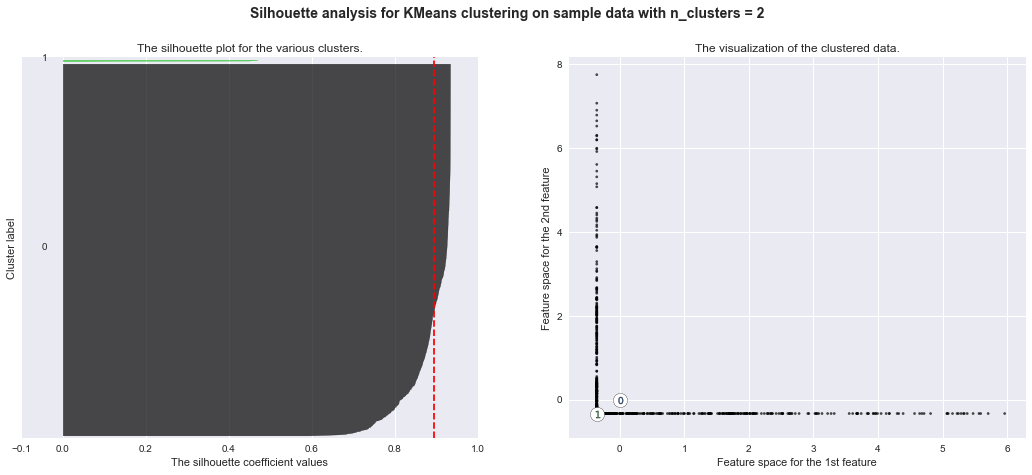

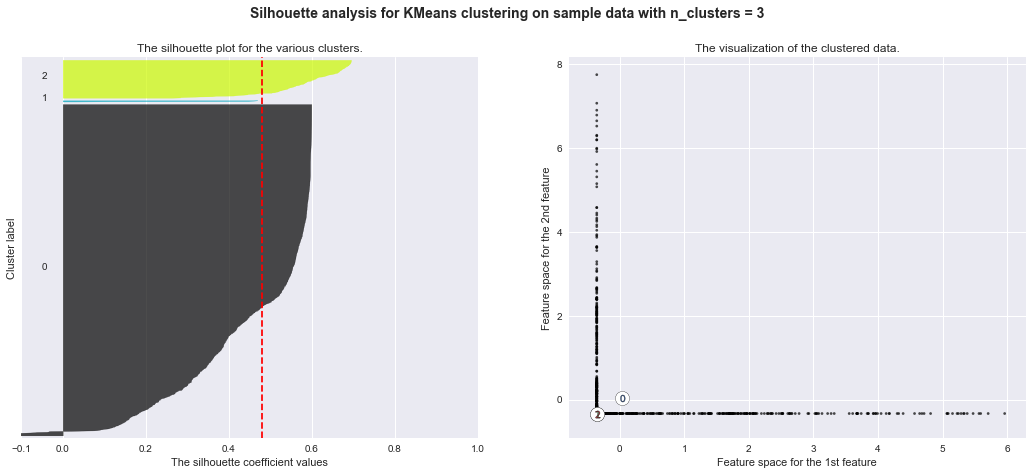

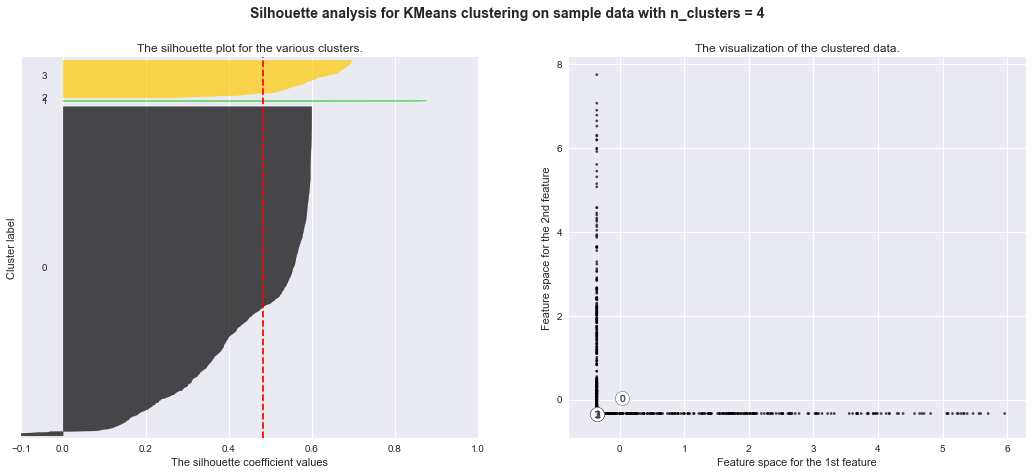

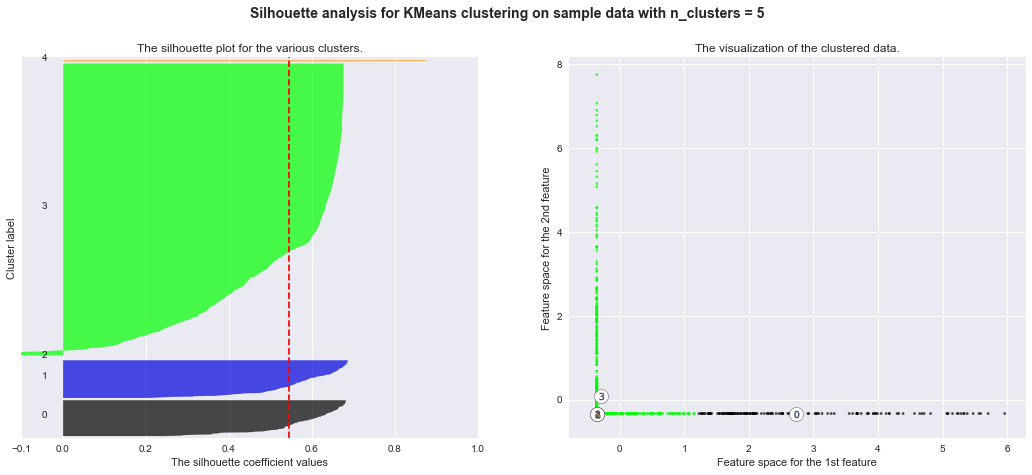

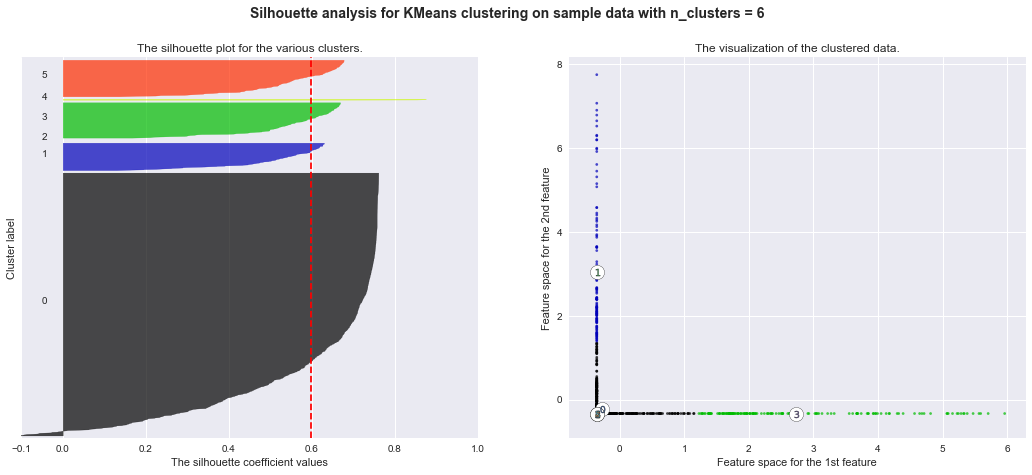

In [49]:
# Determination of optimal number of clusters (And the hidden patterns)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = covid_master_data_scaled.iloc[:,:].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the silhouette_score analysis, it was observed that the best clustering for the dataset will be done considering only two clusters. Let's validate this with the elbow plot for proper identification. 

The SSW values are: 
[9354.         7570.85985088 6260.52191931 5018.01343309]


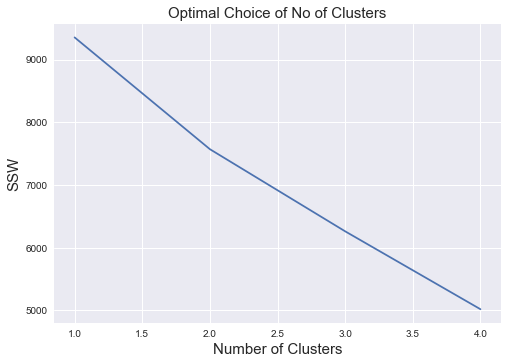

In [50]:
# Determining Optimal Clusters using Sum of Squares Within(SSW)

SSW = np.zeros(5)

for k in range(1, 5):
    
    kmeans_data = KMeans(n_clusters = k, random_state=42).fit(covid_master_data_scaled)
    
    SSW[k] = kmeans_data.inertia_
    
print(f'The SSW values are: \n{SSW[1:5]}')

# To know choice of optimal number of clusters
clusters = range(1, 5)

# Making a plot to depict the elbow for which gives the best curve for clustering
plt.style.use('seaborn')
plt.ylabel('SSW', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=15)
plt.plot(clusters, SSW[1:5])
plt.title('Optimal Choice of No of Clusters', fontsize=15)
plt.show()

There exist a slight curve on the plot at n_clusters = 2; it affirms the silhouette_score analysis result. Having obtained the optimal number of clusters, let's proceed with the clustering process itself using the KMeans Clustering

##### KMeans Clustering: 
K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.

In [51]:
# Making a copy of the scaled dataset for the purpose of KMeans clustering
covid_master_data1_scaled = covid_master_data_scaled.copy()

# Applying Kmeans Clustering, with n_cluster= 2
data_kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
cluster_labels = data_kmeans.fit_predict(covid_master_data1_scaled)

# Printing the labels and the clusters centers
print(data_kmeans.labels_)
print(data_kmeans.cluster_centers_)

# Integrating the labels into the dataframe
covid_master_data_clean['Identified_Cases'] = cluster_labels

covid_master_data_clean.head()

[0 0 0 ... 0 0 0]
[[ 1.37576096e-03  1.27909561e-03  1.25707553e-03  1.40364656e-03
  -5.90587400e-02 -3.03963267e-02]
 [-3.56092796e-01 -3.31072580e-01 -3.25373050e-01 -3.63310519e-01
   1.52863705e+01  7.86758256e+00]]


,Area,Admissions,Published_Date_Case,Specimen_Date_Case,28_Days_Death,First_Dose_Vaccines,second_Dose_Vaccines,Identified_Cases
0,1,0.0,6397.0,0.0,0.0,0.0,0.0,0
1,1,0.0,5605.0,0.0,0.0,0.0,0.0,0
2,1,0.0,5379.0,0.0,0.0,0.0,0.0,0
3,1,0.0,5342.0,0.0,0.0,0.0,0.0,0
4,1,0.0,5312.0,0.0,0.0,0.0,0.0,0


For the identified cases:
* 0 signifies death case
* 1 Signifies non-death case

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


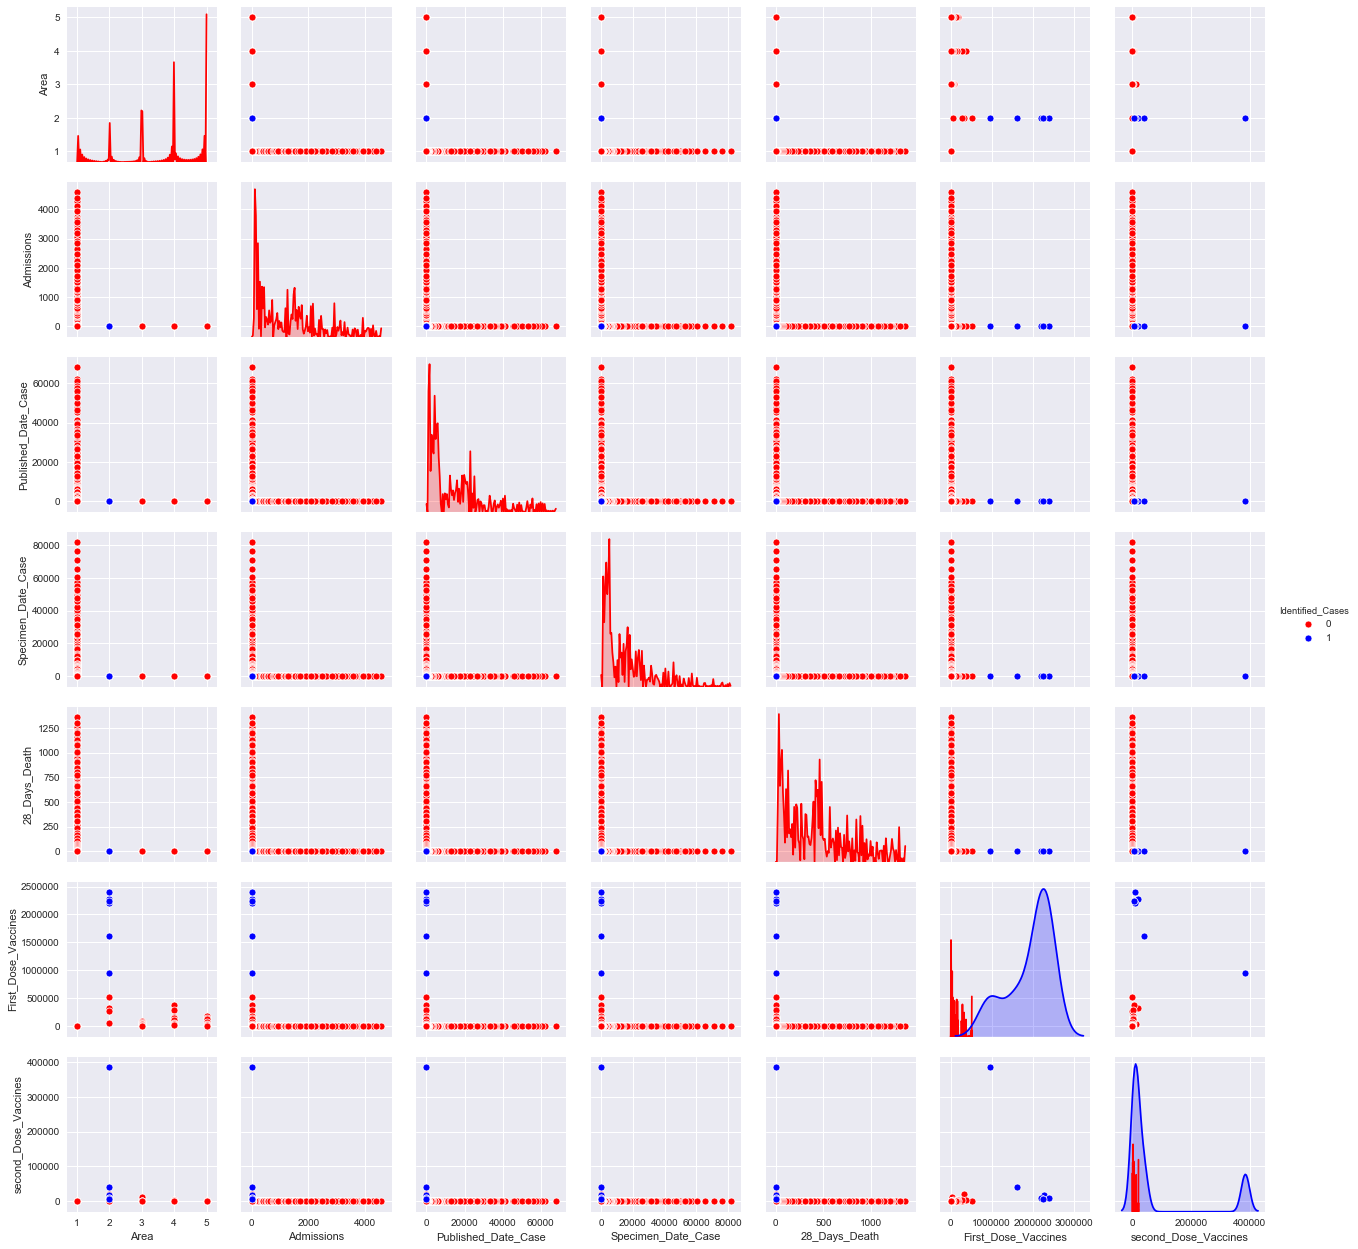

In [52]:
# Making a pairplot
var = ['Area', 'Admissions', 'Published_Date_Case', 'Specimen_Date_Case', '28_Days_Death', 'First_Dose_Vaccines', 'second_Dose_Vaccines']

sns.pairplot(covid_master_data_clean, vars=var,  hue='Identified_Cases', palette=['red', 'blue'])
#plt.title('Pairplot for Expression of the cases identified from the dataset for KMeans', fontsize=14)
plt.show()

From the clustering algorithm used for the identification of patterns, the following can be deduced;

* Two clusters where identified to be the optimal number of clusters, which depicts two major occurences or patterns identified from the dataset.
* The visualization from the pairplot indicates two major cases, which is intuitively signifies the death and living patients. the patients which died as a result of the virus are denoted with te red palette while those which were vaccinated and still living were identified with the blue palette.
* In summary, there are cases identified. 

Having Identified the patients;
* Death = 0
* Not_death = 1

# SECTION C: CLASSIFICATION MODEL TRAINING

#### Aim 3: To train classification models to predict the cities or areas attacked by the virus

It time to train a classification algorithm that will aid in the prediction of this outcome, Models to be used for the prediction are;
* Decision Tree & 
* Random Forest

The following steps are required for the execution of this modeling;
1. Splitting into training dataset and testing dataset for validation
2. Model Training (Decision Tree and Random Forest)
3. Performance Evaluation

1. Splitting the dataset into train and test.

In [53]:
# Separating the input variables from the target variables
X = covid_master_data_clean.iloc[:, 1:] # Input parameters for the model building 
y = covid_master_data_clean.iloc[:, :1] # Target parameters for modeling

In [54]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.shape

(1091, 7)

In [56]:
y_train.shape

(1091, 1)

In [57]:
X_test.shape

(468, 7)

In [58]:
y_test.shape

(468, 1)

2. Model Training

Accuracy: 0.9871794871794872
F1_Score: [1.         0.66666667 0.4        0.44444444 0.57142857]
Precision_Score: [1.         1.         0.5        0.28571429 1.        ]
recall_Score: [1.         0.5        0.33333333 1.         0.4       ]
______________________________

Confusion Matrix: 
[[456   0   0   0   0]
 [  0   1   0   1   0]
 [  0   0   1   2   0]
 [  0   0   0   2   0]
 [  0   0   1   2   2]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       456
           2       1.00      0.50      0.67         2
           3       0.50      0.33      0.40         3
           4       0.29      1.00      0.44         2
           5       1.00      0.40      0.57         5

    accuracy                           0.99       468
   macro avg       0.76      0.65      0.62       468
weighted avg       0.99      0.99      0.99       468



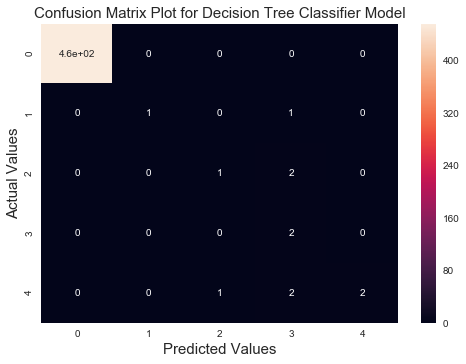

In [59]:
# Model 1: Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(f'F1_Score: {f1_score(y_test, y_pred_dt, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_dt, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_dt, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dt)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_dt)}')

# Plotting the Confusion matrix for dt
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.title('Confusion Matrix Plot for Decision Tree Classifier Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

#### Explanation of the Performance of Decision Tree Model
The metrics used for the evaluation of the decision tree model are;
1. Accuracy: It is the ratio of the number of correct predictions and the total number of predictions. The value of the accuracy ranges from 0-1 (in percentage; it ranges from 0 - 100%)
2. Precision: Precision explains how many of the correct predicted cases actually turned out to be positive. 
3. Recall: Recall explains how many of the actual positive cases we were able to predict correctly with our model.
4. F1 Score: It gives a combined idea about Precision and Recall metrics.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9871794871794872
F1_Score: [1.         0.66666667 0.66666667 0.28571429 0.5       ]
Precision_Score: [1.         1.         0.66666667 0.2        0.66666667]
recall_Score: [1.         0.5        0.66666667 0.5        0.4       ]
______________________________

Confusion Matrix: 
[[456   0   0   0   0]
 [  0   1   0   1   0]
 [  0   0   2   1   0]
 [  0   0   0   1   1]
 [  0   0   1   2   2]]
______________________________

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       456
           2       1.00      0.50      0.67         2
           3       0.67      0.67      0.67         3
           4       0.20      0.50      0.29         2
           5       0.67      0.40      0.50         5

    accuracy                           0.99       468
   macro avg       0.71      0.61      0.62       468
weighted avg       0.99      0.99      0.99       468



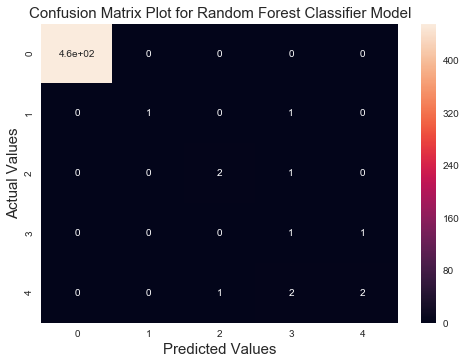

In [60]:
# Model 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1_Score: {f1_score(y_test, y_pred_rf, average=None)}')
print(f'Precision_Score: {precision_score(y_test, y_pred_rf, average=None)}')
print(f'recall_Score: {recall_score(y_test, y_pred_rf, average=None)}')
print('______________________________\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}')
print('______________________________\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_rf)}')

# Plotting the Confusion matrix for RF
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title('Confusion Matrix Plot for Random Forest Classifier Model', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.show()

#### Explanation of the Performance of Random Forest Model
The metrics used for the evaluation of the decision tree model are;
1. Accuracy: It is the ratio of the number of correct predictions and the total number of predictions. The value of the accuracy ranges from 0-1 (in percentage; it ranges from 0 - 100%)
2. Precision: Precision explains how many of the correct predicted cases actually turned out to be positive. 
3. Recall: Recall explains how many of the actual positive cases we were able to predict correctly with our model.
4. F1 Score: It gives a combined idea about Precision and Recall metrics.

## Trend Analysis

1. Decision Tree Trend Analysis

In [61]:
# converting the test dataset to a csv file 
y_test.to_csv('test data.csv', index=False)

# converting the predicted values from decision tree model to csv file
dt_pred_df = pd.DataFrame(y_pred_dt, columns=['dt_predicted'])
dt_pred_df.to_csv('dt_pred data.csv', index=False)

In [62]:
# Loading the dataset
test_data = pd.read_csv('test data.csv') # Test Data
dt_data = pd.read_csv('dt_pred data.csv') # Decision Tree Predicted values 

dt_ = test_data.join(dt_data)
dt_.head()

,Area,dt_predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


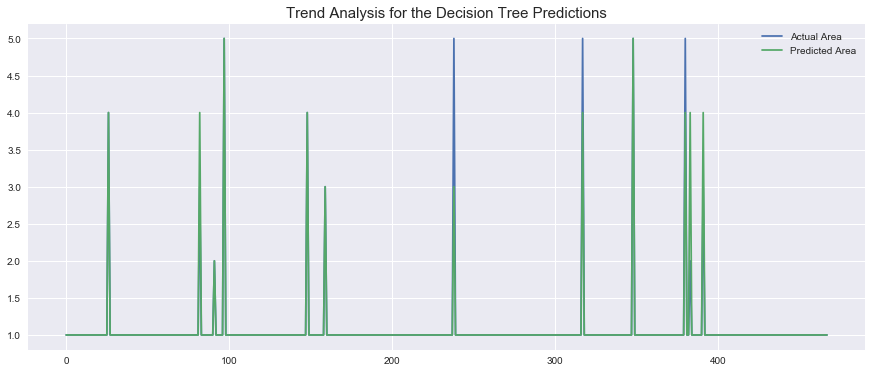

In [63]:
# Making  a plot for the decision tree trend analysis
plt.style.use('seaborn')
plt.figure(figsize=(15, 6))
plt.plot(list(dt_.index) , dt_['Area'], label='Actual Area')
plt.plot(list(dt_.index), dt_['dt_predicted'], label='Predicted Area')
plt.title('Trend Analysis for the Decision Tree Predictions', fontsize=15)
plt.legend()
plt.show()

The trend for the decision tree prediction shows a the trend in predicting the areas for which the covid virus affected. The comparision is fair enough to say that the predicted values are close to the predicted values.

2. Random Forest Trend Analysis

In [64]:
# converting the predicted values from Random forest model to csv file
dt_pred_rf = pd.DataFrame(y_pred_rf, columns=['rfr_predicted'])
dt_pred_rf.to_csv('rf_pred data.csv', index=False)

In [65]:
# Loading the dataset
rf_data = pd.read_csv('rf_pred data.csv') # Decision Tree Predicted values 

rf_ = test_data.join(rf_data)
rf_.head()

,Area,rfr_predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


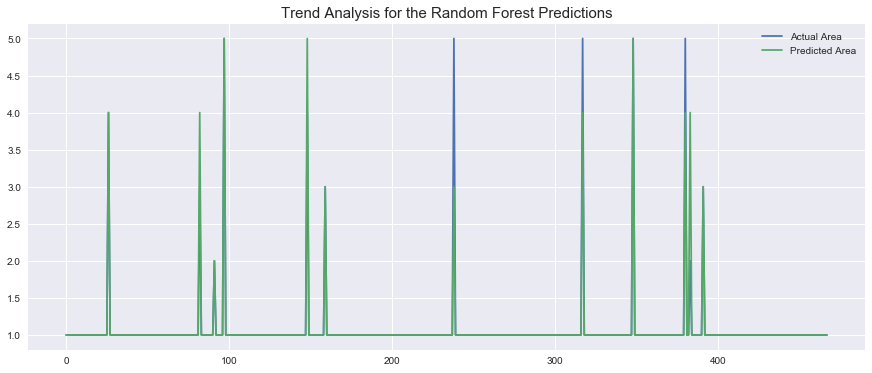

In [66]:
# Making  a plot for the random forest trend analysis
plt.style.use('seaborn')
plt.figure(figsize=(15, 6))
plt.plot(list(rf_.index) , rf_['Area'], label='Actual Area')
plt.plot(list(rf_.index), rf_['rfr_predicted'], label='Predicted Area')
plt.title('Trend Analysis for the Random Forest Predictions', fontsize=15)
plt.legend()
plt.show()

The trend for the random forest prediction shows a the trend in predicting the areas for which the covid virus affected. The comparision is fair enough to say that the predicted values are close to the predicted values.

# CONCLUSION 

At the end of the analysis and the model training, the research questions were all answered.
1. Does Vacination against Covid-19 actually reduce the Death rate of covid patients?
2. What are the Hidden Patterns in the Dataset?
3. Can Classification models predict countries or areas with Death record from the Covid 19 pandemic?
4. Which country(ies) has a Death Record form the Covid 19 Pandemic?

##### 1. Does Vaccination against covid-19 reduce the death rate of covid in patients?
During the EDA process it was observed that the areas with vaccinations (i.e England, Northern, Ireland, cotland & Wales)  did not have a record death case. This signifies that vaccinations against covid actually reduced death rate as death was not recorded in those areas.

##### 2. What are the Hidden Patterns in the Dataset
For the identification of hidden patterns hidden in the dataset, An unsupervised learning algorithm was used to uncover the hidden patterns. It obtain two major insights;
* The identification of the Patients that are death which was denoted a value 0 and 
* The identification of the Patients still living. 


This is absolutely true as there are largely two categories of person in the entire dataset, the death and the non_death

##### 3. Can Classification models predict countries or areas with Death record from the Covid 19 pandemic?
In prediction of areas or countries with death record, the two models applied for the prediction performed very well with accuracies of each models shown below;
* Decision Tree Model Accuracy = 98.72% and 
* Random Forest Model Accuracy = 98.72% as well

This shows that the classification models can actually predict the class of areas or countries which were affected by the virus

##### 4. Which country(ies) has a Death Record form the Covid 19 Pandemic?
From the EDA, Clustering and the classification modeling it can be deduced that the country with the record of the virus is the 'United Kingdom' 